对于数据可视化一般会进行如下操作：
1. 单特征分布可视化
2. 特征与标签关系可视化
3. 特征与特征关系可视化

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 设置字体和负号，防止乱码
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

data=pd.read_csv('data.csv')
data.head() 

,Id,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
0,0,Own Home,482087.0,NaN,0.0,11.0,26.3,685960.0,1.0,NaN,1.0,debt consolidation,Short Term,99999999.0,47386.0,7914.0,749.0,0
1,1,Own Home,1025487.0,10+ years,0.0,15.0,15.3,1181730.0,0.0,NaN,0.0,debt consolidation,Long Term,264968.0,394972.0,18373.0,737.0,1
2,2,Home Mortgage,751412.0,8 years,0.0,11.0,35.0,1182434.0,0.0,NaN,0.0,debt consolidation,Short Term,99999999.0,308389.0,13651.0,742.0,0
3,3,Own Home,805068.0,6 years,0.0,8.0,22.5,147400.0,1.0,NaN,1.0,debt consolidation,Short Term,121396.0,95855.0,11338.0,694.0,0
4,4,Rent,776264.0,8 years,0.0,13.0,13.6,385836.0,1.0,NaN,0.0,debt consolidation,Short Term,125840.0,93309.0,7180.0,719.0,0


In [12]:
# 查询连续特征
continuous_feature=data.select_dtypes(include=['float64']).columns.tolist()
continuous_feature

['Annual Income',
 'Tax Liens',
 'Number of Open Accounts',
 'Years of Credit History',
 'Maximum Open Credit',
 'Number of Credit Problems',
 'Months since last delinquent',
 'Bankruptcies',
 'Current Loan Amount',
 'Current Credit Balance',
 'Monthly Debt',
 'Credit Score']

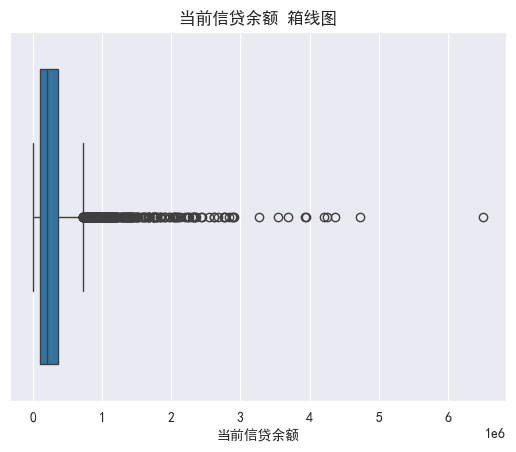

In [23]:
# 单特征：连续特征箱线图
sns.boxplot(x=data['Current Credit Balance'])
plt.title('当前信贷余额 箱线图')
plt.xlabel('当前信贷余额')
plt.show()

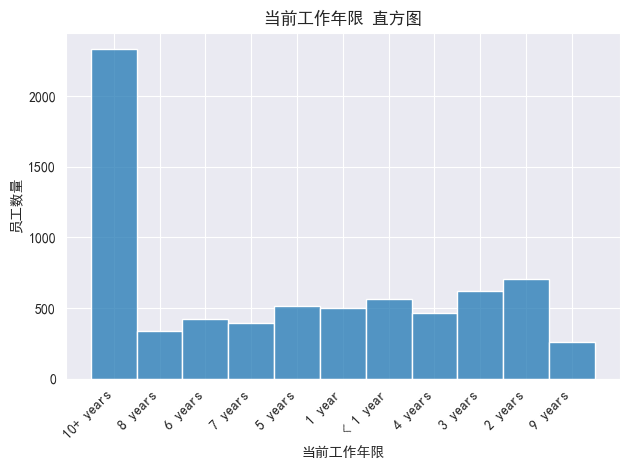

In [36]:
# 单特征：离散特征直方图
sns.histplot(x=data['Years in current job'])
plt.title('当前工作年限 直方图')
plt.xlabel('当前工作年限')
plt.ylabel('员工数量')
plt.xticks(rotation=45, ha='right')  # 旋转45度，并右对齐
plt.tight_layout()  # 自动调整子图参数，提供足够的空间
plt.show()

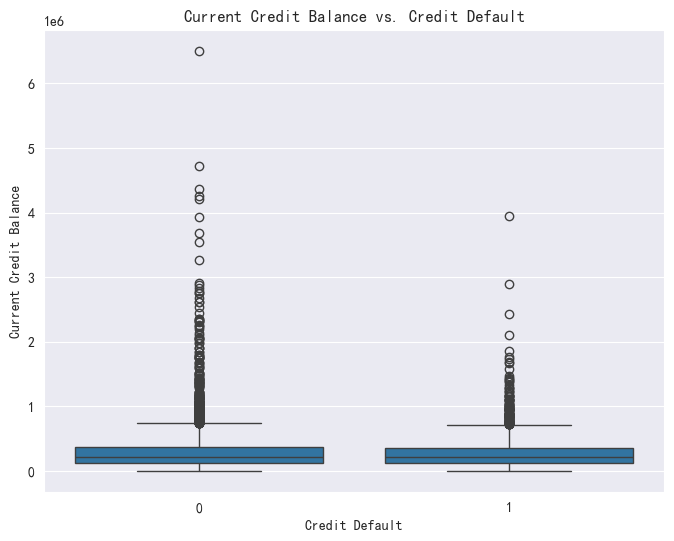

In [42]:
# 连续特征和标签关系：箱线图
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['Credit Default'],y=data['Current Credit Balance'])
plt.title('Current Credit Balance vs. Credit Default')
plt.xlabel('Credit Default')
plt.ylabel('Current Credit Balance')
plt.show()

**结论：**
1. 该指标的中位数和中间 50% 人群的余额分布，在 “违约” 与 “未违约” 人群中差异不大。
2. 其中，未违约人群中存在更多 “高信贷余额” 的极端个体，说明部分人即使持有很高的信贷余额，仍能保持良好信用（反之，违约人群中高信贷余额的极端情况更少）。
3. 这说明当前信贷余额可能不是区分 “违约 / 未违约” 的强指标，单纯的债务总额高低对违约行为的预测性较弱。

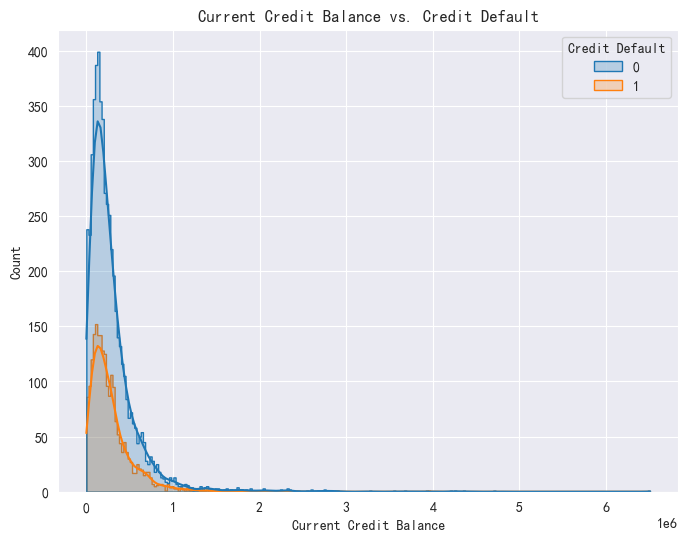

In [38]:
# 连续特征和标签关系：核密度直方图
plt.figure(figsize=(8, 6))
sns.histplot(x='Current Credit Balance', hue='Credit Default', data=data, kde=True, element="step")
plt.title('Current Credit Balance vs. Credit Default')
plt.xlabel('Current Credit Balance')
plt.ylabel('Count')
plt.show()

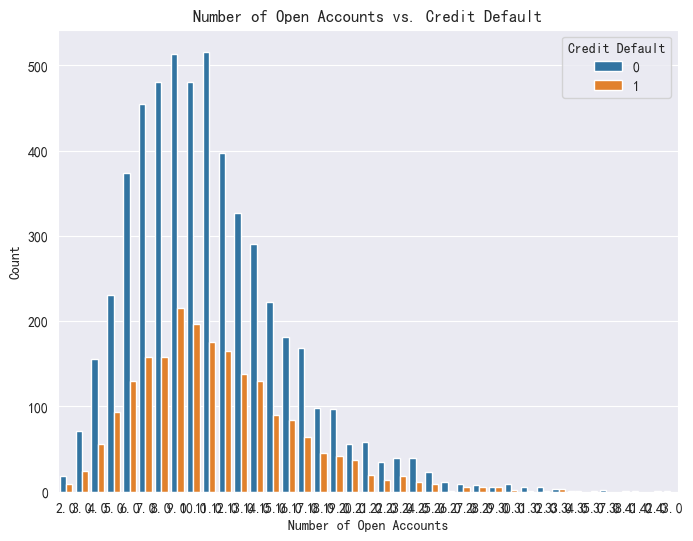

In [40]:
# 离散特征和标签关系
plt.figure(figsize=(8, 6))
sns.countplot(x=data['Number of Open Accounts'], hue=data['Credit Default'])
plt.title('Number of Open Accounts vs. Credit Default')
plt.xlabel('Number of Open Accounts')
plt.ylabel('Count')
plt.show()

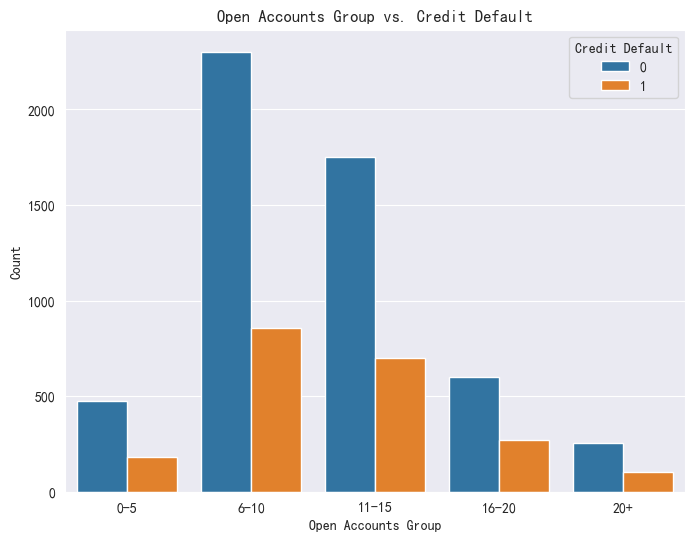

In [43]:
data['Open Accounts Group']=pd.cut(data['Number of Open Accounts'],bins=[0,5,10,15,20,float('inf')],labels=['0-5', '6-10', '11-15', '16-20', '20+'])
plt.figure(figsize=(8, 6))
sns.countplot(x=data['Open Accounts Group'],hue=data['Credit Default'])
plt.title('Open Accounts Group vs. Credit Default')
plt.xlabel('Open Accounts Group')
plt.ylabel('Count')
plt.show()